# Generate Monitor Data as Alibaba Format

In [2]:
import pandas as pd
import json

In [17]:
usage_data = pd.read_csv('/data/clusterdata/cluster-trace-v2017/usage_data_small.csv')
init_data = pd.read_csv('/data/clusterdata/cluster-trace-v2017/init_data_small.csv')

In [18]:
usage_data.head()

,Unnamed: 0,start_time,pod_id,used_cpu,used_mem
0,88,39600,66,0.3600,0.020187
1,152,39600,65,0.4320,0.017345
2,1143,39600,32,0.3392,0.035539
3,1162,39600,31,1.1460,0.037702
4,1189,39600,33,0.4984,0.022630


In [19]:
init_data.head()

,Unnamed: 0,start_time,pod_id,node_id,used_cpu,used_mem
0,0,39600,0,0,1.8720,0.054504
1,1,39600,1,1,0.2784,0.024767
2,2,39600,2,2,0.0880,0.015963
3,3,39600,3,3,0.3280,0.022324
4,4,39600,4,4,0.4608,0.017227


In [34]:
with open('/data/rise_monitor_data.json','r') as f:
    monitor_data = json.load(f)

In [35]:
monitor_data

{'vm-4c8g-node2': [{'pod_name': 'buyservice-c989f4bd6-28mnk',
   'data': [['2022-04-09T00:37:18.700575Z', 45178880.0, 0.03106019136666873],
    ['2022-04-09T00:42:18.809156Z', 40583168.0, 0.025608269133317662],
    ['2022-04-09T00:47:18.841383Z', 40697856.0, 0.014094757166670514],
    ['2022-04-09T00:52:18.917300Z', 40144896.0, 0.018669204700017872],
    ['2022-04-09T00:57:19.011512Z', 40992768.0, 0.02761965086665441],
    ['2022-04-09T01:02:19.121979Z', 47046656.0, 0.02225630119998338],
    ['2022-04-09T01:07:19.232151Z', 39780352.0, 0.020765311766657153],
    ['2022-04-09T01:12:19.305984Z', 40968192.0, 0.011593063966665795],
    ['2022-04-09T01:17:19.330082Z', 40943616.0, 0.037606220666657454],
    ['2022-04-09T01:22:19.392565Z', 47439872.0, 0.030336988266693274],
    ['2022-04-09T01:27:19.412641Z', 46534656.0, 0.025058976099990103],
    ['2022-04-09T01:32:19.487172Z', 48644096.0, 0.028147634400011157],
    ['2022-04-09T01:37:19.603440Z', 40083456.0, 0.02879161886667135],
    ['2022-

In [36]:
monitor_data_df = pd.DataFrame(columns=['start_time','pod_id','node_id','used_cpu','used_mem'])

In [37]:
pod_dict = {}
node_dict = {}
pod_counter = 0
node_counter = 0

for node,pods in monitor_data.items():
    if node not in node_dict:
        node_dict[node] = node_counter
        node_counter += 1
    for pod in pods:
        if pod['pod_name'] in ['influxdb-776b79db44-g668h','webapp-d5585d547-kzqn8']:
            continue
        if pod['pod_name'] not in pod_dict:
            pod_dict[pod['pod_name']] = pod_counter
            pod_counter += 1 

In [38]:
pod_dict, node_dict

({'buyservice-c989f4bd6-28mnk': 0,
  'partservice-5f8f9bd749-52pvl': 1,
  'storageservice-69df9b8f8c-kx4hq': 2,
  'storageservice-1-9585bfc6b-g8spv': 3,
  'tableservice-f64f7b4b7-qwn5h': 4,
  'timeservice-7fcb68698b-qv4mg': 5},
 {'vm-4c8g-node2': 0, 'vm-4c8g-node3': 1})

In [39]:
import time

counter = 0
base_time = 1648851133+584705
for node,pods in monitor_data.items():
    if node == 'vm-8c16g-node10':
        continue
    node_id = node_dict[node]
    for pod in pods:
        if pod['pod_name'] in ['influxdb-776b79db44-g668h','webapp-d5585d547-kzqn8']:
            continue
        pod_id = pod_dict[pod['pod_name']]
        for data in pod['data']:
            start_time = time.mktime(time.strptime(data[0],'%Y-%m-%dT%H:%M:%S.%fZ'))-base_time
            used_mem = data[1]
            used_cpu = data[2]
            monitor_data_df.loc[counter] = [start_time,pod_id,node_id,used_cpu,used_mem]
            counter+=1

In [40]:
monitor_data_df[(monitor_data_df['used_cpu']>0) & (monitor_data_df['used_mem']>0)]

,start_time,pod_id,node_id,used_cpu,used_mem
0,0.0,0.0,0.0,0.031060,45178880.0
1,300.0,0.0,0.0,0.025608,40583168.0
2,600.0,0.0,0.0,0.014095,40697856.0
3,900.0,0.0,0.0,0.018669,40144896.0
4,1201.0,0.0,0.0,0.027620,40992768.0
...,...,...,...,...,...
3672,182749.0,5.0,1.0,0.000233,36241408.0
3673,183049.0,5.0,1.0,0.000101,36159488.0
3674,183349.0,5.0,1.0,0.000200,35958784.0
3675,183649.0,5.0,1.0,0.000057,35864576.0


In [41]:
monitor_data_df['pod_id'].unique()

array([0., 1., 2., 3., 4., 5.])

In [42]:
monitor_data_df['node_id'].unique()

array([0., 1.])

In [43]:
monitor_data_df = monitor_data_df.sort_values('start_time')

In [44]:
monitor_data_df.iloc[0]['start_time']

0.0

In [45]:
monitor_data_df.head()

,start_time,pod_id,node_id,used_cpu,used_mem
0,0.0,0.0,0.0,0.031060,45178880.0
1839,0.0,3.0,1.0,0.000461,93003776.0
1226,0.0,2.0,0.0,0.016328,139395072.0
3063,0.0,5.0,1.0,0.019145,37564416.0
613,0.0,1.0,0.0,0.033759,140369920.0


In [46]:
monitor_data_df['used_mem'] = monitor_data_df['used_mem']/(8*10**9)*10*1.5
monitor_data_df["used_cpu"] = monitor_data_df['used_cpu']/4*10

<AxesSubplot:xlabel='start_time'>

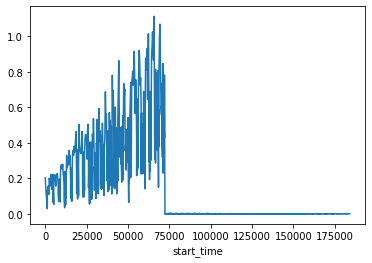

In [47]:
monitor_data_df[monitor_data_df['node_id']==0].groupby('start_time').sum()['used_cpu'].plot()

<AxesSubplot:xlabel='start_time'>

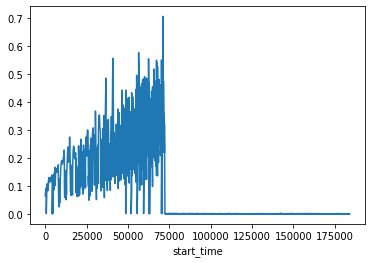

In [48]:
monitor_data_df[monitor_data_df['node_id']==1].groupby('start_time').sum()['used_cpu'].plot()

<AxesSubplot:xlabel='start_time'>

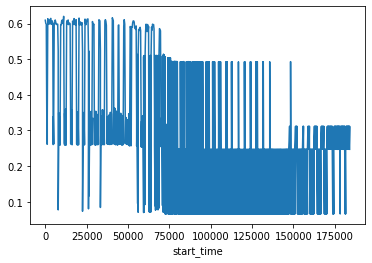

In [49]:
monitor_data_df[monitor_data_df['node_id']==0].groupby('start_time').sum()['used_mem'].plot()

<AxesSubplot:xlabel='start_time'>

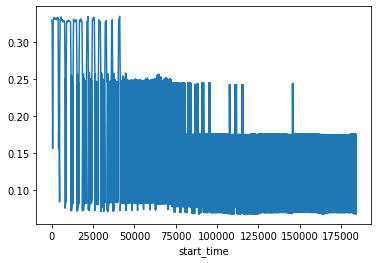

In [50]:
monitor_data_df[monitor_data_df['node_id']==1].groupby('start_time').sum()['used_mem'].plot()

In [51]:
init_data_small = monitor_data_df[monitor_data_df['start_time']==0]

In [52]:
usage_data_small = monitor_data_df[['start_time','pod_id','node_id','used_cpu','used_mem']]

In [53]:
init_data_small.to_csv('/data/rise_monitor_init_data.csv')
usage_data_small.to_csv('/data/rise_monitor_usage_data.csv')

In [1]:
import pandas as pd

usage_data = pd.read_csv('/data/monitor_usage_data.csv')

In [5]:
usage_data['start_time'].unique()

array([0.00000e+00, 8.60000e+01, 1.31000e+02, ..., 1.76009e+05,
       1.76029e+05, 1.76046e+05])

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-f_6_sejt because the default path (/home/user/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


<AxesSubplot:xlabel='start_time'>

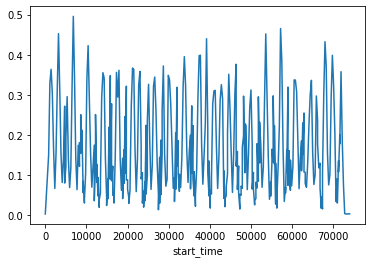

In [1]:
import pandas as pd
init_data = pd.read_csv('/data/monitor_init_data.csv')
usage_data = pd.read_csv('/data/monitor_usage_data.csv')
monitor_data_df = usage_data
monitor_data_df[monitor_data_df['node_id']==0].groupby('start_time').sum()['used_cpu'].plot()

<AxesSubplot:xlabel='start_time'>

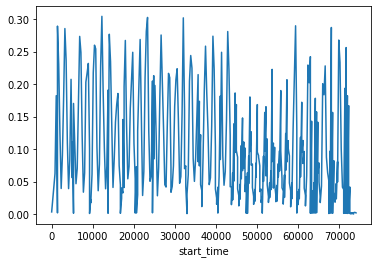

In [2]:
monitor_data_df[monitor_data_df['node_id']==1].groupby('start_time').sum()['used_cpu'].plot()

<AxesSubplot:xlabel='start_time'>

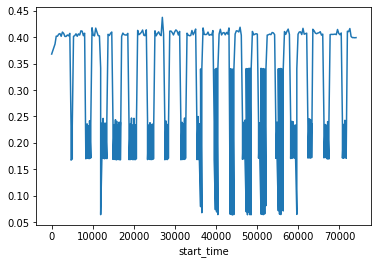

In [3]:
monitor_data_df[monitor_data_df['node_id']==0].groupby('start_time').sum()['used_mem'].plot()

<AxesSubplot:xlabel='start_time'>

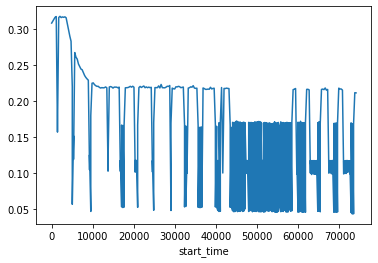

In [4]:
monitor_data_df[monitor_data_df['node_id']==1].groupby('start_time').sum()['used_mem'].plot()

In [1]:
import pandas as pd
init_data = pd.read_csv('/data/monitor_init_data.csv')
usage_data = pd.read_csv('/data/monitor_usage_data.csv')
init_data.head()

,Unnamed: 0,start_time,pod_id,node_id,used_cpu,used_mem
0,0,0.0,0.0,0.0,0.000786,0.057641
1,492,0.0,2.0,0.0,0.000538,0.154337
2,1228,0.0,5.0,1.0,0.000221,0.070149
3,983,0.0,4.0,1.0,0.000566,0.083891
4,738,0.0,3.0,1.0,0.002520,0.153882


In [7]:
init_data = init_data.assign(node_id=lambda x: 1)

In [9]:
usage_data = usage_data.assign(node_id=lambda x:1)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-f6csmr2w because the default path (/home/user/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


<AxesSubplot:xlabel='start_time'>

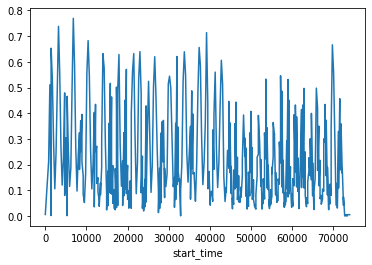

In [10]:
monitor_data_df = usage_data
monitor_data_df[monitor_data_df['node_id']==1].groupby('start_time').sum()['used_cpu'].plot()

<AxesSubplot:xlabel='start_time'>

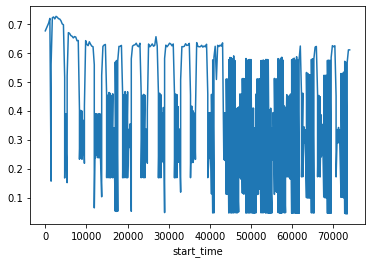

In [11]:
monitor_data_df[monitor_data_df['node_id']==1].groupby('start_time').sum()['used_mem'].plot()

In [12]:
monitor_data_df.to_csv('/data/monitor_usage_data_imbalanced.csv')
init_data.to_csv('/data/monitor_init_data_imbalanced.csv')